In [1]:
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"D:\Ahmed\DEPI\DEPI_projects\src\Python\session 7\Assignment\bank.csv")
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,yes


In [5]:
df.shape

(11162, 15)

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'deposit'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   balance    11162 non-null  int64 
 5   housing    11162 non-null  object
 6   loan       11162 non-null  object
 7   contact    11162 non-null  object
 8   day        11162 non-null  int64 
 9   month      11162 non-null  object
 10  duration   11162 non-null  int64 
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  deposit    11162 non-null  object
dtypes: int64(7), object(8)
memory usage: 1.3+ MB


In [ ]:
df.isnull().sum()  #  return false if there's no null 

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
deposit      0
dtype: int64

In [ ]:
df.notnull().sum()   # return true if there's values 


age          11162
job          11162
marital      11162
education    11162
balance      11162
housing      11162
loan         11162
contact      11162
day          11162
month        11162
duration     11162
campaign     11162
pdays        11162
previous     11162
deposit      11162
dtype: int64

| Feature       | Description                                            | Type                                           |
| ------------- | ------------------------------------------------------ | ---------------------------------------------- |
| **age**       | Age of the customer                                    | Numerical (Continuous)                         |
| **marital**   | Marital status (married, single, divorced)             | Categorical (Nominal)                          |
| **education** | Level of education (secondary, tertiary, unknown)      | Categorical (Ordinal)                          |
| **job**       | Type of job (management, technical, blue-collar, etc.) | Categorical (Nominal)                          |
| **housing**   | Housing status (own, rent)                             | Categorical (Binary)                           |
| **loan**      | Has the customer received a previous loan (yes/no)     | Categorical (Binary)                           |
| **contact**   | Month of last contact                                  | Numerical *(should be categorical or ordinal)* |
| **day**       | Day of week of last contact                            | Numerical *(ordinal: 1–7)*                     |
| **month**     | Month of last contact                                  | Numerical *(ordinal: 1–12)*                    |
| **duration**  | Duration of last contact (seconds)                     | Numerical (Continuous)                         |
| **campaign**  | Number of contacts during current campaign             | Numerical (Discrete)                           |
| **previous**  | Number of previous contacts by phone                   | Numerical (Discrete)                           |
| **pdays**     | Days since last contact from previous campaign         | Numerical (Discrete)                           |
| **preferred** | Preferred communication channel (telephone, cellular)  | Categorical (Binary)                           |


In [25]:
num_col=df.select_dtypes(include=['int64','float64']).columns
cat_col=df.select_dtypes(include=['object']).columns
print('Numerical columns',list(num_col))
print('Categorical columns',list(cat_col))

Numerical columns ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical columns ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'deposit']


In [30]:
null = df.isnull().sum()
ratio = (null / len(df)) * 100

missing_table = pd.DataFrame({
    'Column': null.index,
    'Null_Count': null.values,
    'Null_Percentage (%)': ratio.values
}).T

missing_table


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Column,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
Null_Count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Null_Percentage (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##There is  no missing values so no need for 'Handling Missing Values'

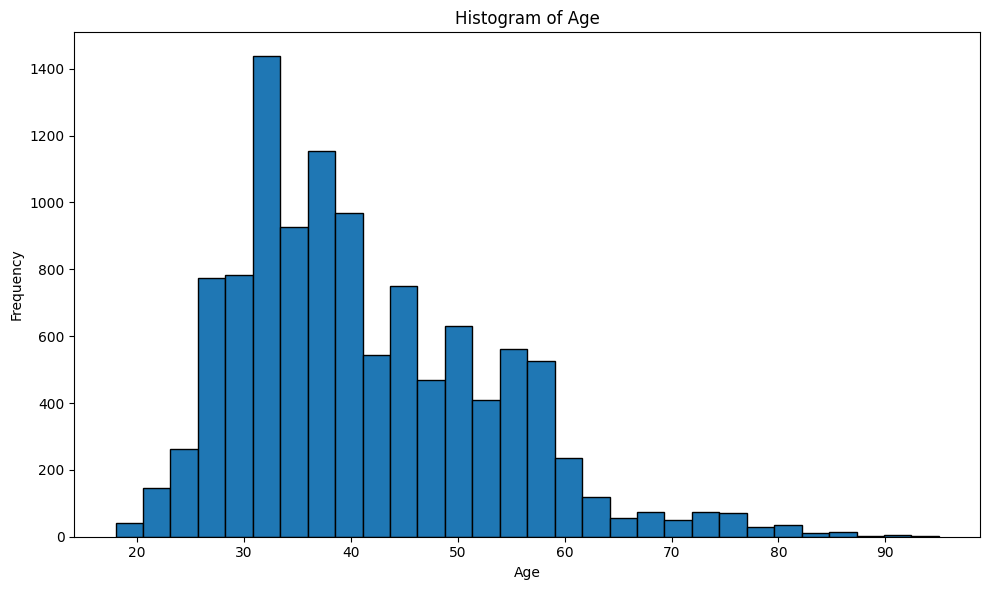

Interpretation: The histogram shows the age distribution of customers. Most customers appear to be in their 30s-50s age range, indicating a middle-aged customer base.


In [36]:
# 1. Histogram of age
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.tight_layout()
plt.show()
print("Interpretation: The histogram shows the age distribution of customers. Most customers appear to be in their 30s-50s age range, indicating a middle-aged customer base.")

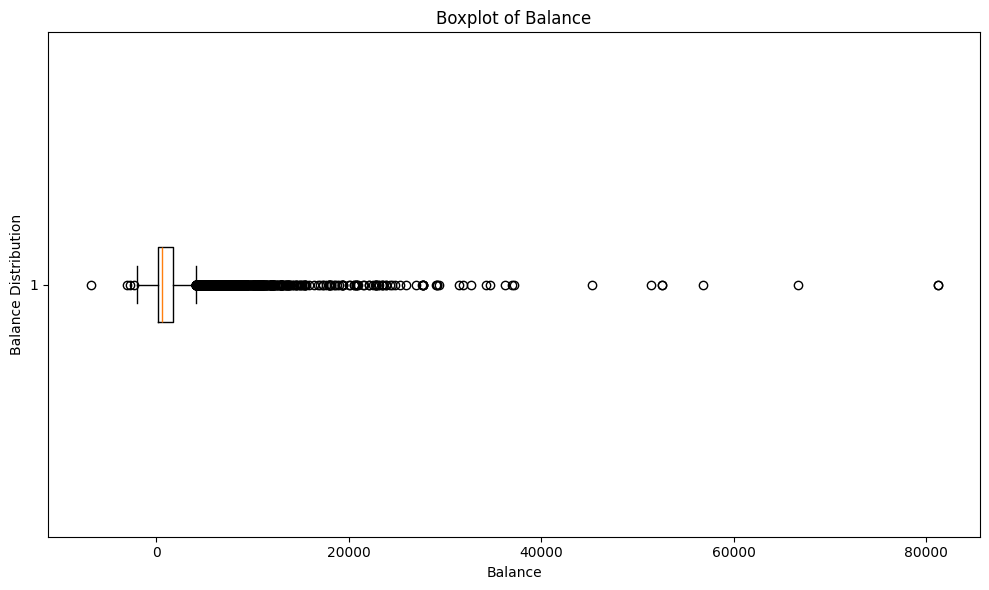

Interpretation: The boxplot reveals the balance distribution with potential outliers. Most customers have relatively low balances, with a few high-value outliers indicating wealthier customers.


In [37]:
# 2. Boxplot of balance
plt.figure(figsize=(10, 6))
plt.boxplot(df['balance'], vert=False)
plt.xlabel('Balance')
plt.ylabel('Balance Distribution')
plt.title('Boxplot of Balance')
plt.tight_layout()
plt.show()
print("Interpretation: The boxplot reveals the balance distribution with potential outliers. Most customers have relatively low balances, with a few high-value outliers indicating wealthier customers.")


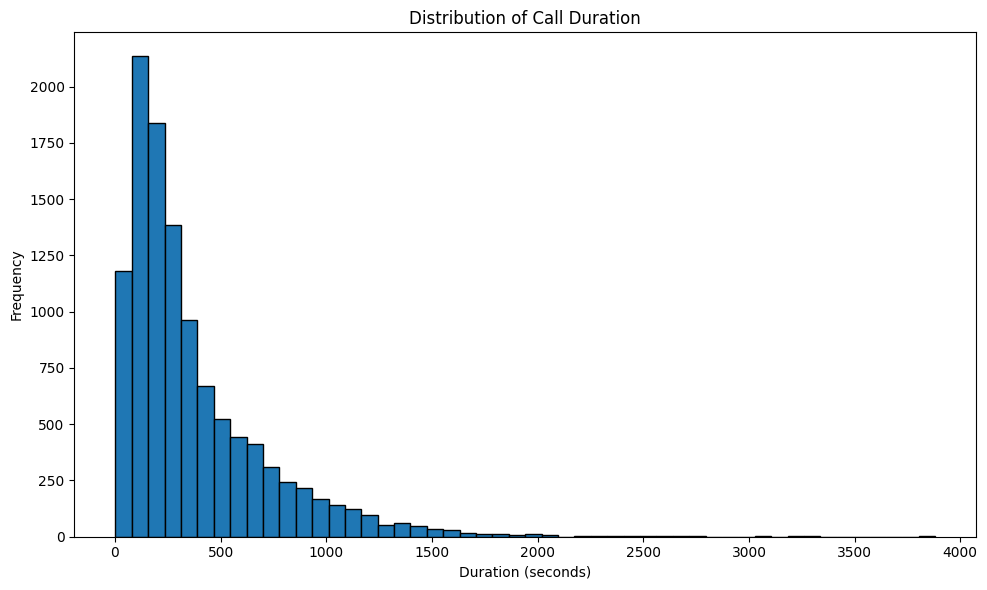

Interpretation: The duration histogram shows call length distribution. Most calls are relatively short, with a right-skewed distribution indicating longer calls are less common.


In [38]:
# 3. Distribution of duration
plt.figure(figsize=(10, 6))
plt.hist(df['duration'], bins=50, edgecolor='black')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Call Duration')
plt.tight_layout()
plt.show()
print("Interpretation: The duration histogram shows call length distribution. Most calls are relatively short, with a right-skewed distribution indicating longer calls are less common.")


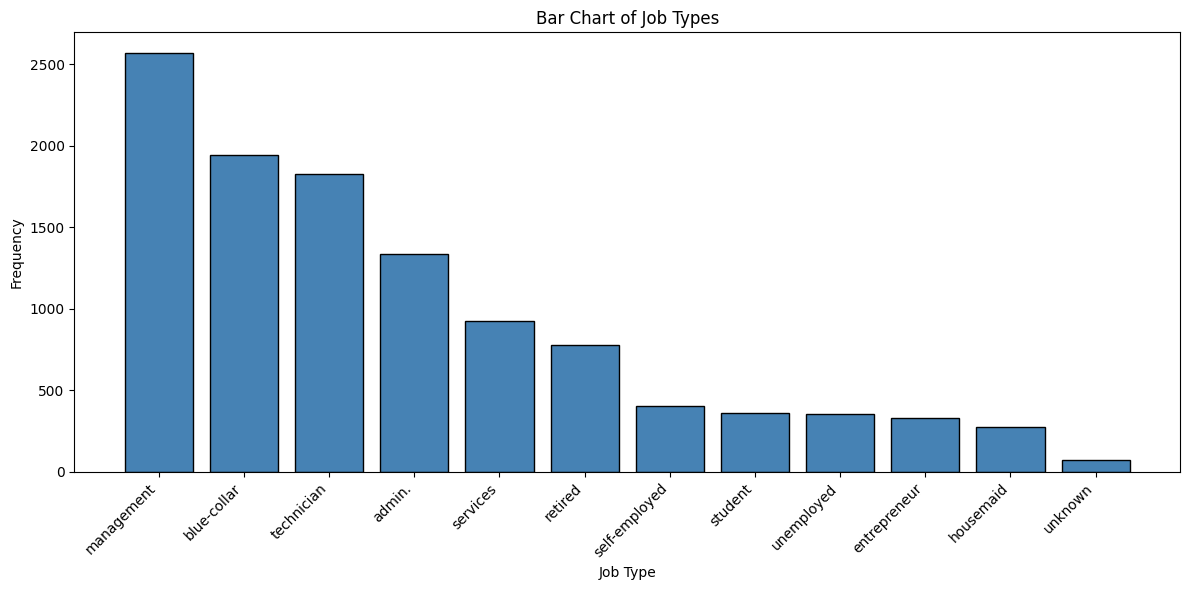

Interpretation: The bar chart displays the frequency of different job types. Administrative and blue-collar jobs appear to be the most common occupations among customers.


In [39]:
# 4. Bar chart of job
plt.figure(figsize=(12, 6))
job_counts = df['job'].value_counts()
plt.bar(job_counts.index, job_counts.values, color='steelblue', edgecolor='black')
plt.xlabel('Job Type')
plt.ylabel('Frequency')
plt.title('Bar Chart of Job Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Interpretation: The bar chart displays the frequency of different job types. Administrative and blue-collar jobs appear to be the most common occupations among customers.")

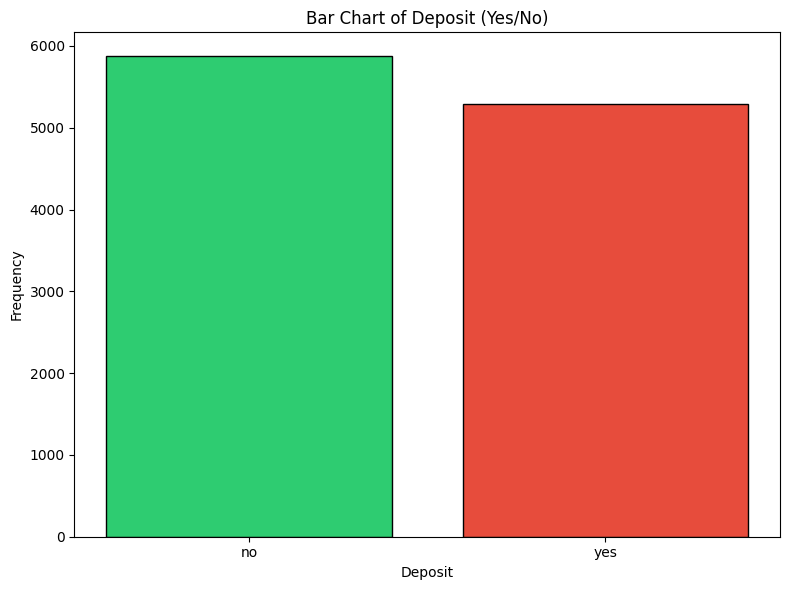

Interpretation: The bar chart shows the distribution of deposit outcomes. This reveals whether customers opened a deposit account (yes) or not (no), helping understand the campaign's success rate.


In [40]:
# 5. Bar chart of deposit (yes/no)
plt.figure(figsize=(8, 6))
deposit_counts = df['deposit'].value_counts()
plt.bar(deposit_counts.index, deposit_counts.values, color=['#2ecc71', '#e74c3c'], edgecolor='black')
plt.xlabel('Deposit')
plt.ylabel('Frequency')
plt.title('Bar Chart of Deposit (Yes/No)')
plt.tight_layout()
plt.show()
print("Interpretation: The bar chart shows the distribution of deposit outcomes. This reveals whether customers opened a deposit account (yes) or not (no), helping understand the campaign's success rate.")

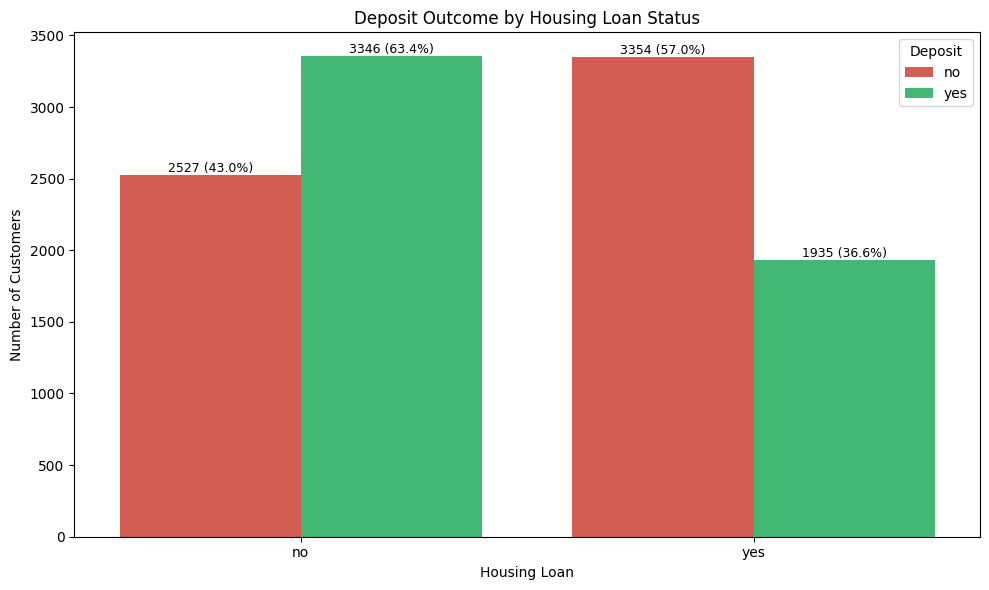

Interpretation: Each bar shows how many customers are in each housing group (yes/no) and whether they made a deposit, with the percentage labels on top making the difference between groups much easier to see.


In [42]:
# 6. Count plot of deposit vs housing (with percentages)
counts = df.groupby(['housing', 'deposit']).size().reset_index(name='count')
totals = counts.groupby('housing')['count'].transform('sum')
counts['pct'] = counts['count'] / totals * 100

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=counts, x='housing', y='count', hue='deposit',
                 palette={'yes': '#2ecc71', 'no': '#e74c3c'})
plt.xlabel('Housing Loan')
plt.ylabel('Number of Customers')
plt.title('Deposit Outcome by Housing Loan Status')
plt.legend(title='Deposit', loc='upper right')

# Annotate each bar with count and percentage
for p, (_, row) in zip(ax.patches, counts.iterrows()):
    ax.annotate(f"{int(row['count'])} ({row['pct']:.1f}%)",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("Interpretation: Each bar shows how many customers are in each housing group (yes/no) and whether they made a deposit, with the percentage labels on top making the difference between groups much easier to see.")

### Very brief answers

1. **Most effective preprocessing**  
   **Encoding categorical variables** (e.g., converting text columns to numeric).

2. **Most related feature to deposit**  
   **`duration`** (longer calls → more likely to subscribe).

3. **Problems if preprocessing is skipped**  
   **Model errors and low accuracy** because of text columns, scale differences, and outliers.